### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
import keras

Using TensorFlow backend.


In [3]:
tf.__version__

'1.13.1'

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Collect Data

In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [7]:
trainX.shape
trainY.shape
testX.shape
testY.shape


(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [8]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

C:\Users\rajan\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]')

Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

Text(0.5, 1.0, '[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]')

Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

Text(0.5, 1.0, '[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]')

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

Text(0.5, 1.0, '[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]')

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

Text(0.5, 1.0, '[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

label for each of the below images:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


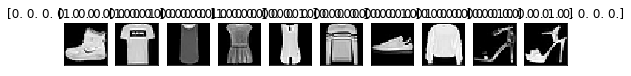

In [10]:
fig, axes = plt.subplots(1, 10,figsize=(9, 9), sharey=True, sharex=True)

for i in range(10):
    axes[i].imshow(trainX[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    axes[i].set_title(trainY[i])
    
plt.xticks([])
plt.yticks([])

print('label for each of the below images: ', trainY[0:10])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [11]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

trainX = trainX.reshape(60000, 784)
testX = testX.reshape(10000, 784)

trainX.shape
trainY.shape
testX.shape
testY.shape

(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


(60000, 784)

(60000, 10)

(10000, 784)

(10000, 10)

In [12]:
model = tf.keras.models.Sequential([ tf.keras.layers.Dense(10,input_shape=(784,),activation='softmax')])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [13]:
model.fit(trainX, trainY, batch_size=trainX.shape[0], epochs=30, verbose=2, validation_data=(testX, testY))
score, acc = model.evaluate(testX, testY, verbose=0)
print('Test accuracy:', acc)



Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 1s - loss: 2.3156 - acc: 0.1106 - val_loss: 2.2817 - val_acc: 0.1166
Epoch 2/30
 - 0s - loss: 2.2759 - acc: 0.1184 - val_loss: 2.2482 - val_acc: 0.1258
Epoch 3/30
 - 0s - loss: 2.2424 - acc: 0.1279 - val_loss: 2.2189 - val_acc: 0.1378
Epoch 4/30
 - 0s - loss: 2.2131 - acc: 0.1408 - val_loss: 2.1928 - val_acc: 0.1517
Epoch 5/30
 - 0s - loss: 2.1869 - acc: 0.1564 - val_loss: 2.1690 - val_acc: 0.1691
Epoch 6/30
 - 0s - loss: 2.1630 - acc: 0.1742 - val_loss: 2.1470 - val_acc: 0.1876
Epoch 7/30
 - 0s - loss: 2.1409 - acc: 0.1944 - val_loss: 2.1265 - val_acc: 0.2054
Epoch 8/30
 - 0s - loss: 2.1203 - acc: 0.2139 - val_loss: 2.1071 - val_acc: 0.2240
Epoch 9/30
 - 0s - loss: 2.1008 - acc: 0.2341 - val_loss: 2.0887 - val_acc: 0.2418
Epoch 10/30
 - 0s - loss: 2.0823 - acc: 0.2526 - val_loss: 2.0710 - val_acc: 0.2592
Epoch 11/30
 - 0s - loss: 2.0645 - acc: 0.2701 - val_loss: 2.0540 - val

Test accuracy: 0.4862


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [14]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
#model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.Dense(10, activation='relu', input_dim=784))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [15]:
model.fit(trainX, trainY, batch_size=trainX.shape[0], epochs=30, verbose=2, validation_data=(testX, testY))
score, acc = model.evaluate(testX, testY, verbose=0)
print('Test accuracy:', acc)


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 2.5153 - acc: 0.1129 - val_loss: 2.2668 - val_acc: 0.1309
Epoch 2/30
 - 0s - loss: 2.3394 - acc: 0.1450 - val_loss: 2.2328 - val_acc: 0.1607
Epoch 3/30
 - 0s - loss: 2.2220 - acc: 0.1833 - val_loss: 2.2028 - val_acc: 0.1874
Epoch 4/30
 - 0s - loss: 2.1299 - acc: 0.2197 - val_loss: 2.1777 - val_acc: 0.2067
Epoch 5/30
 - 0s - loss: 2.0586 - acc: 0.2528 - val_loss: 2.1563 - val_acc: 0.2202
Epoch 6/30
 - 0s - loss: 2.0005 - acc: 0.2826 - val_loss: 2.1374 - val_acc: 0.2309
Epoch 7/30
 - 0s - loss: 1.9509 - acc: 0.3083 - val_loss: 2.1205 - val_acc: 0.2390
Epoch 8/30
 - 0s - loss: 1.9074 - acc: 0.3326 - val_loss: 2.1053 - val_acc: 0.2408
Epoch 9/30
 - 0s - loss: 1.8686 - acc: 0.3539 - val_loss: 2.0919 - val_acc: 0.2412
Epoch 10/30
 - 0s - loss: 1.8343 - acc: 0.3738 - val_loss: 2.0799 - val_acc: 0.2402
Epoch 11/30
 - 0s - loss: 1.8041 - acc: 0.3906 - val_loss: 2.0690 - val_acc: 0.2409
Epoch 12/30
 - 0s - loss: 1.7772 - 

Test accuracy: 0.3007


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [16]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10, activation='relu', input_dim=784))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.001)
#Comile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:

model.fit(trainX, trainY, batch_size=trainX.shape[0], epochs=30, verbose=2, validation_data=(testX, testY))
score, acc = model.evaluate(testX, testY, verbose=0)
print('Test accuracy:', acc)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 2.9487 - acc: 0.0716 - val_loss: 2.5307 - val_acc: 0.0576
Epoch 2/30
 - 0s - loss: 2.9329 - acc: 0.0736 - val_loss: 2.5235 - val_acc: 0.0567
Epoch 3/30
 - 0s - loss: 2.9171 - acc: 0.0757 - val_loss: 2.5164 - val_acc: 0.0562
Epoch 4/30
 - 0s - loss: 2.9013 - acc: 0.0780 - val_loss: 2.5095 - val_acc: 0.0555
Epoch 5/30
 - 0s - loss: 2.8853 - acc: 0.0799 - val_loss: 2.5026 - val_acc: 0.0550
Epoch 6/30
 - 0s - loss: 2.8695 - acc: 0.0823 - val_loss: 2.4959 - val_acc: 0.0553
Epoch 7/30
 - 0s - loss: 2.8536 - acc: 0.0839 - val_loss: 2.4894 - val_acc: 0.0549
Epoch 8/30
 - 0s - loss: 2.8379 - acc: 0.0859 - val_loss: 2.4830 - val_acc: 0.0554
Epoch 9/30
 - 0s - loss: 2.8223 - acc: 0.0882 - val_loss: 2.4769 - val_acc: 0.0556
Epoch 10/30
 - 0s - loss: 2.8070 - acc: 0.0904 - val_loss: 2.4710 - val_acc: 0.0563
Epoch 11/30
 - 0s - loss: 2.7920 - acc: 0.0924 - val_loss: 2.4653 - val_acc: 0.0570
Epoch 12/30
 - 0s - loss: 2.7773 - 

Test accuracy: 0.0983


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [18]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10, activation='relu', input_dim=784))

#Add 3 Dense Layers 
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.03)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])



## Review model

In [19]:
score, acc = model.evaluate(testX, testY, verbose=0)
print('Test accuracy:', acc)

Test accuracy: 0.1


### Run the model

In [20]:

model.fit(trainX, trainY, batch_size=trainX.shape[0], epochs=30, verbose=2, validation_data=(testX, testY))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 2.3660 - acc: 0.1000 - val_loss: 2.3558 - val_acc: 0.1000
Epoch 2/30
 - 1s - loss: 2.3558 - acc: 0.1000 - val_loss: 2.3472 - val_acc: 0.1000
Epoch 3/30
 - 0s - loss: 2.3472 - acc: 0.1000 - val_loss: 2.3400 - val_acc: 0.1000
Epoch 4/30
 - 1s - loss: 2.3400 - acc: 0.1000 - val_loss: 2.3339 - val_acc: 0.1000
Epoch 5/30
 - 1s - loss: 2.3339 - acc: 0.1000 - val_loss: 2.3287 - val_acc: 0.1000
Epoch 6/30
 - 0s - loss: 2.3287 - acc: 0.1000 - val_loss: 2.3244 - val_acc: 0.1000
Epoch 7/30
 - 0s - loss: 2.3244 - acc: 0.1000 - val_loss: 2.3208 - val_acc: 0.1000
Epoch 8/30
 - 0s - loss: 2.3208 - acc: 0.1000 - val_loss: 2.3178 - val_acc: 0.1000
Epoch 9/30
 - 0s - loss: 2.3177 - acc: 0.1000 - val_loss: 2.3152 - val_acc: 0.1000
Epoch 10/30
 - 0s - loss: 2.3152 - acc: 0.1000 - val_loss: 2.3131 - val_acc: 0.1000
Epoch 11/30
 - 0s - loss: 2.3130 - acc: 0.1000 - val_loss: 2.3113 - val_acc: 0.1000
Epoch 12/30
 - 0s - loss: 2.3112 - 